# Chapter 2, demo 1
## uniform prior on $\theta $
#### (Bayesian Data Analysis, 3rd ed.)

437 girls and 543 boys have been observed. Calculate and plot the posterior distribution of the proportion of girls $\theta $, using
.

In [1]:
# Import necessary packages

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt

# Fast array routines for numerical calculation
import numpy as np
# Scipy contains various scietific tools, such as beta distribution
from scipy.stats import beta

In [2]:
# Edit default plot settings (colours from colorbrewer2.org)
plt.rc('figure', figsize=(8,6))
plt.rc('font', size=16)
plt.rc('lines', color='#377eb8', linewidth=2)
plt.rc('axes', color_cycle=('#377eb8','#e41a1c','#4daf4a',
                            '#984ea3','#ff7f00','#ffff33'))

C:\Users\Jinkyoo\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


The posterior distribution is Beta(438,544).

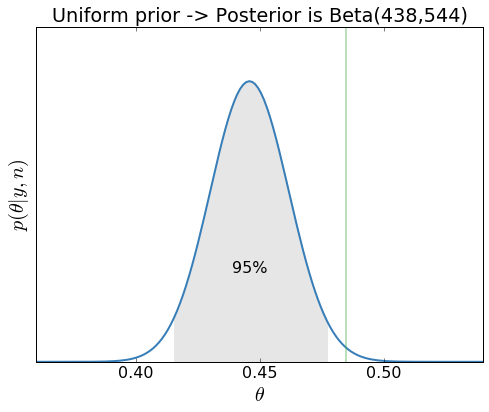

In [3]:
# Create grid of 150 points from 0.36 to 0.54
x = np.linspace(0.36, 0.54, 150)
# Freeze a beta distribution object with given parameters
dist = beta(438, 544)
# Probability density function at x
pd = dist.pdf(x)

# Plot pd
plt.plot(x, pd)

# Plot proportion of girl babies in general population as a vertical line
plt.axvline(0.485, color='#4daf4a', linewidth=1.5, alpha=0.5)

# Find the points in x that are between 2.5% and 97.5% quantile
# dist.ppf is percent point function (inverse of cdf)
x_95_idx = (x > dist.ppf(0.025)) & (x < dist.ppf(0.975))
# Shade the 95% central posterior interval
plt.fill_between(x[x_95_idx], pd[x_95_idx], color=(0.9,0.9,0.9))
# Add text into the shaded area
plt.text(dist.median(), 8, "95%", horizontalalignment='center')
# Add labels and title
plt.xlabel(r'$\theta$', fontsize=20)
plt.ylabel(r'$p(\theta|y,n)$', fontsize=20)
plt.title('Uniform prior -> Posterior is Beta(438,544)')
# Remove ticks from the y-axis
plt.yticks(())
# Scale x-axis to the data.
# N.B. The last semicolon is here just to prevent ipython notebook
# from displaying the return value of the last command.
plt.autoscale(axis='x', tight=True);

# Chapter 2, demo 2
## Informative prior on $\theta $
#### (Bayesian Data Analysis, 3rd ed.)

Illustrate the effect of a prior. Comparison of posterior distributions with different parameter values for Beta prior distribution.

In [4]:
# Import necessary packages

import numpy as np
from scipy.stats import beta

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# Edit default plot settings (colours from colorbrewer2.org)
plt.rc('figure', figsize=(8,6))
plt.rc('font', size=16)
plt.rc('lines', color='#377eb8', linewidth=2)
plt.rc('axes', color_cycle=('#377eb8','#e41a1c','#4daf4a',
                            '#984ea3','#ff7f00','#ffff33'))

In [21]:
# Grid
x = np.linspace(0.375, 0.525, 150)

# Posterior with data (437,543) and uniform prior Beta(1,1)
au = 438
bu = 544
# Calculate densities
pdu = beta.pdf(x, au, bu)

# Compare 3 cases
# Arrays of different priors: Beta(0.485*n,(1-0.485)*n), for n = 2, 20, 200
ap = np.array([0.485 * (2*10**i) for i in range(3)])
bp = np.array([(1-0.485) * (2*10**i) for i in range(3)])
# Corresponding posteriors with data (437,543)
ai = 437 + ap
bi = 543 + bp
# Calculate prior and posterior densities
pdp = beta.pdf(x, ap[:,np.newaxis], bp[:,np.newaxis])
pdi = beta.pdf(x, ai[:,np.newaxis], bi[:,np.newaxis])

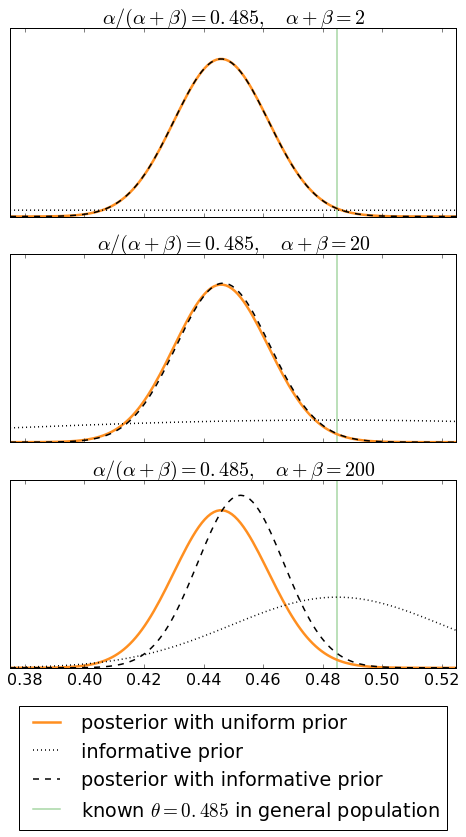

In [22]:
# Plot 3 subplots
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True,
                         figsize=(8, 12))
# Leave space for the legend on bottom and remove some space from the top
fig.subplots_adjust(bottom=0.2, top=0.94)
for i in range(3):
    # Add vertical line
    known = axes[i].axvline(0.485, color='#4daf4a', linewidth=1.5, alpha=0.5)
    # Plot three precalculated densities
    post1, = axes[i].plot(x, pdu, color='#ff8f20', linewidth=2.5)
    prior, = axes[i].plot(x, pdp[i], 'k:', linewidth=1.5)
    post2, = axes[i].plot(x, pdi[i], 'k--', linewidth=1.5)
    plt.yticks(())
    # Set the title for this subplot
    axes[i].set_title(r'$\alpha/(\alpha+\beta) = 0.485,\quad \alpha+\beta = {}$'
                      .format(2*10**i), fontsize=20)
# Limit xaxis
axes[0].autoscale(axis='x', tight=True)
axes[0].set_ylim((0,30))
# Add legend to the last subplot
axes[-1].legend(
    (post1, prior, post2, known),
    ( 'posterior with uniform prior',
      'informative prior',
      'posterior with informative prior',
     r'known $\theta=0.485$ in general population'),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15)
);

# Chapter 2, demo 3
## Informative prior on $\theta $
#### (Bayesian Data Analysis, 3rd ed.)

Calculate the posterior distribution on a discrete grid of points by multiplying the likelihood and a non-conjugate prior at each point, and normalizing over the points. Simulate samples from the resulting non-standard posterior distribution using inverse cdf using the discrete grid.

In [23]:
# Import necessary packages

import numpy as np
from scipy.stats import beta

%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
# Edit default plot settings (colours from colorbrewer2.org)
plt.rc('figure', figsize=(8,6))
plt.rc('font', size=16)
plt.rc('lines', color='#377eb8', linewidth=2)
plt.rc('axes', color_cycle=('#377eb8','#e41a1c','#4daf4a',
                            '#984ea3','#ff7f00','#ffff33'))

In [25]:
# Data (437,543)
a = 437
b = 543

# Grid of nx points
nx = 1000
x = np.linspace(0, 1, nx)

# Compute density of non-conjugate prior in grid
# This non-conjugate prior is same as in Figure 2.4 in the book
pp = np.ones(nx)
ascent = (0.385 <= x) & (x <= 0.485)
descent = (0.485 <= x) & (x <= 0.585)
pm = 11
pp[ascent] = np.linspace(1, pm, np.count_nonzero(ascent))
pp[descent] = np.linspace(pm, 1, np.count_nonzero(descent))
# Normalize the prior
pp /= np.sum(pp)

# Unnormalised non-conjugate posterior in grid
po = beta.pdf(x, a, b)*pp
po /= np.sum(po)
# Cumulative
pc = np.cumsum(po)

# Inverse-cdf sampling
# Get n uniform random numbers from [0,1]
n = 10000
r = np.random.rand(n)
# Map each r into corresponding grid point x:
# [0, pc[0]) map into x[0] and [pc[i-1], pc[i]), i>0, map into x[i]
rr = x[np.sum(pc[:,np.newaxis] < r, axis=0)]

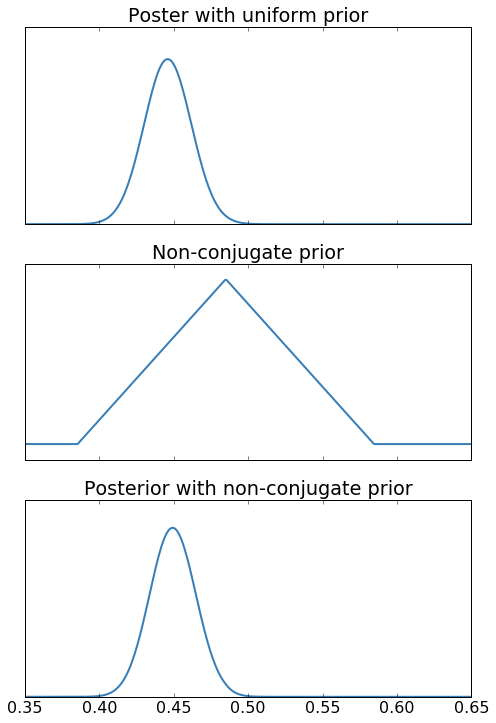

In [26]:
# Plot 3 subplots
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 12))
# Posterior with uniform prior Beta(1,1)
axes[0].plot(x, beta.pdf(x, a+1, b+1))
axes[0].set_title('Poster with uniform prior')
axes[0].set_yticks(())
# Non-conjugate prior
axes[1].plot(x, pp)
axes[1].set_title('Non-conjugate prior')
axes[1].set_yticks(())
# Posterior with non-conjugate prior
axes[2].plot(x, po)
axes[2].set_title('Posterior with non-conjugate prior')
axes[2].set_yticks(())
# Set custom limits for x-axis
axes[0].set_xlim((0.35, 0.65))
fig.subplots_adjust(hspace=0.2)

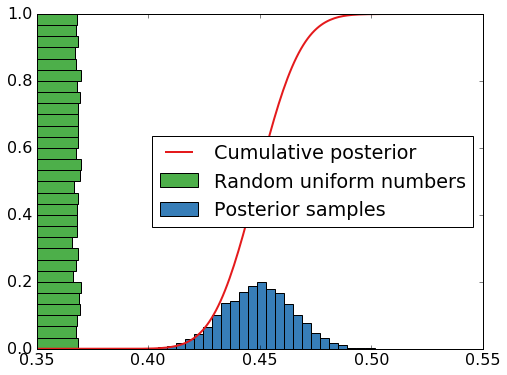

In [27]:
# Plot samples
fig = plt.figure()
# Plot cumulative posterior
plt.plot(x, pc, color='#e41a1c')
# Calculate histograms and scale them into the same figure
hist_r = np.histogram(r, bins=30)
hist_rr = np.histogram(rr, bins=30)
plt.barh(hist_r[1][:-1], hist_r[0]*0.02/hist_r[0].max(),
        height=hist_r[1][1]-hist_r[1][0], left=0.35, color='#4daf4a')
plt.bar(hist_rr[1][:-1], hist_rr[0]*0.2/hist_rr[0].max(),
        width=hist_rr[1][1]-hist_rr[1][0], color='#377eb8')
plt.legend(('Cumulative posterior', 'Random uniform numbers',
            'Posterior samples'), loc='best')
# Set limits
plt.xlim((0.35, 0.55))
plt.ylim((0,1));